In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
from sklearn import metrics

In [ ]:
adult = pd.read_csv('./data/adult.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-279c48ee5ecb>", line 1, in <module>
    adult = pd.read_csv('./data/adult.data',
  File "/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 452, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 946, in __init__
    self._make_engine(self.engine)
  File "/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 1178, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 2008, in __init__
    self._reader = parsers.T

In [98]:
adult.head(2)

ERROR! Session/line number was not unique in

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


 database. History logging moved to new session 122


In [44]:
# Избавиться от лишних признаков
adult.drop(['native-country'], axis=1, inplace=True)
# Сконвертировать целевой столбец в бинарные значения
adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [45]:
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

In [46]:
# Разбить таблицу данных на матрицы X и y
X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# Добавить фиктивный столбец единиц (bias линейной модели)
#X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
#m = X.shape[1]

In [63]:
y_true = y.copy

In [64]:
my_model = LogisticRegression().fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
y_pred = my_model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Задание 3.9.1

2/2 points (graded)
Постройте модель логистической регрессии при помощи sklearn. Используйте параметры по умолчанию, обучите на всей выборке и посчитайте F1 score.



In [67]:
f1_score(y, y_pred)

0.6621280179674339

Задание 3.9.2

0.0/3.0 points (graded)
Посчитайте confusion matrix для классификатора из задачи 3.9.1. Для получения матрицы можно воспользоваться методом sklearn.metrics.confusion_matrix(y_true, y_pred), либо посчитать каждый элемент вручную.

In [72]:
confusion_matrix(y, y_pred)

array([[23030,  1690],
       [ 3124,  4717]])

Задание 3.9.3

0.0/2.0 points (graded)
Постройте ROC-кривую и посчитайте  для классификатора из задачи 3.9.1.

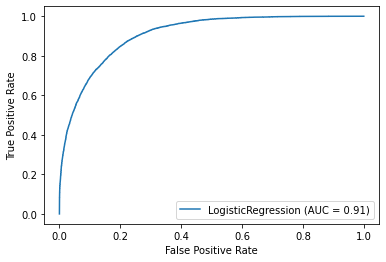

In [84]:
metrics.plot_roc_curve(my_model, X, y)
plt.show()

Задание 3.9.4

0.0/2.0 points (graded)
Постройте модель логистической регрессии при помощи sklearn без регуляризации. Чему равен ?



In [86]:
my_model_reg = LogisticRegression(C=1000).fit(X, y)
y_pred_reg = my_model.predict(X)
f1_score(y, y_pred_reg)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6621280179674339

Задание 3.9.5

0.0/2.0 points (graded)
Переберите коэффициенты -регуляризации от  до  с шагом  и определите, на каком из них модель логистической регрессии из sklearn даёт наибольший  .

In [96]:
l2 = [i/100 for i in range(1, 100)]
l2

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99]

In [ ]:
my_model_l2 = LogisticRegression(C=0.5).fit(X, y)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 120
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-9cc8e1d8bcac>", line 1, in <module>
    my_model_l2 = LogisticRegression(C=0.5).fit(X, y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 807, in check_X_y
    y = column_or_1d(y, warn=True)
  File "/o

In [ ]:
iteration = 0
f1score = 0
for i in l2:
    my_model_l2 = LogisticRegression(penalty='l2', solver = 'liblinear', C=0.5).fit(X, y)
    y_pred_l2 = my_model_l2.predict(X)
    f1 = f1_score(y, y_pred_l2)
    if f1score < f1:
        iteration, f1score = i, y
print(iteration, f1score)


    
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 116
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-81fcf732cd4e>", line 4, in <module>
    my_model_l2 = LogisticRegression(penalty='l2', solver = 'liblinear', C=0.5).fit(X, y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 807, in check_X_y
    y = c

In [76]:
roc_auc_score(y, y_pred)

0.7666078675735255

ERROR! Session/line number was not unique in database. History logging moved to new session 96


In [74]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

In [77]:
# Вычислить вероятности принадлежности классу 1 для каждого объекта из валидационной выборки
y_pred_proba = my_model.predict_proba(X)
#calc_and_plot_roc(y, y_pred_proba)

In [78]:
y_pred_proba

array([[0.87124636, 0.12875364],
       [0.59845612, 0.40154388],
       [0.97235398, 0.02764602],
       ...,
       [0.96364548, 0.03635452],
       [0.99613184, 0.00386816],
       [0.00500917, 0.99499083]])

ERROR! Session/line number was not unique in database. History logging moved to new session 97


In [79]:
roc_auc_score(y, y_pred)

0.7666078675735255

In [3]:
probs = [0.2, 0.8, 1, 0.6]
testy = [0, 0, 1, 1]

In [8]:
log_loss(testy, probs, normalize=False)

2.343407087514302

In [9]:
probs = [[0.2, 0.3, 0.5], [0, 0, 1], [0.1, 0, 0.9]]
testy = [[0, 0, 1], [0, 0, 1], [1, 0, 0]]

In [24]:
log_loss(testy, probs, normalize=True)

0.998577424517998

In [20]:
a = [(testy[i][j] - probs[i][j]) for i, elem in enumerate(probs) for j,_ in enumerate(elem)]

In [23]:
a

[-0.2, -0.3, 0.5, 0, 0, 0, 0.9, 0, -0.9]

In [22]:
sum(a)

0.0

In [16]:
[(i, elem) for i, elem in enumerate(probs)]

[(0, [0.2, 0.3, 0.5]), (1, [0, 0, 1]), (2, [0.1, 0, 0.9])]